In [10]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
#2.1.1 Load the data from Mall_Customers.csv
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


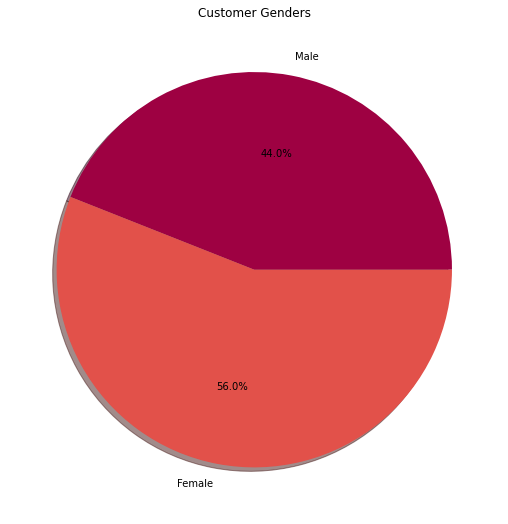

In [12]:
#2.1.2a - pie plot to illustate the breakdowns of feature Gender
title_type = df.groupby('Gender').agg('count')
type_labels = title_type.CustomerID.sort_values().index 
type_counts = title_type.CustomerID.sort_values()

plt.figure(1, figsize=(40,20)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Customer Genders')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

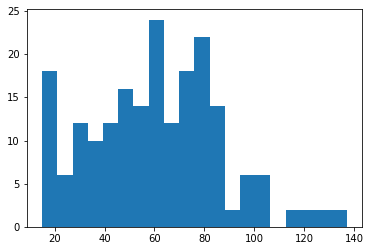

In [13]:
#2.1.2b - histogram 
df['Annual Income (k$)']
plt.hist(df['Annual Income (k$)'], bins=20)
plt.show() 

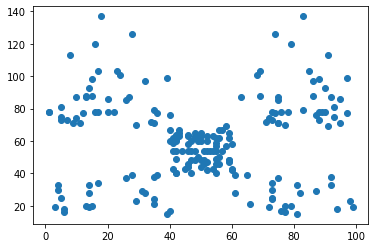

In [14]:
#2.1.2c - scatter plot to show the relationship between spending score and annual income
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.show()

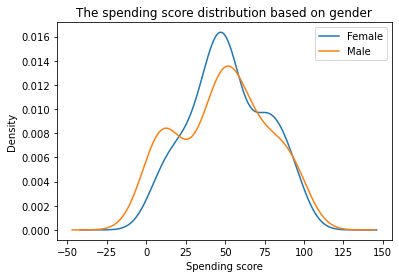

In [15]:
#2.1.2d - distribution for the spending score based on gender
df.groupby('Gender')['Spending Score (1-100)'].plot.kde(legend=True)
plt.xlabel('Spending score')
plt.title('The spending score distribution based on gender')
plt.show()

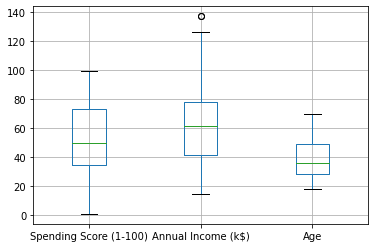

In [16]:
#2.1.3.a - boxplots for spending score, annual income and age
boxplot = df.boxplot(column=['Spending Score (1-100)', 'Annual Income (k$)', 'Age'])

In [17]:
#2.1.3.a - five-number summary
five_sum = df.describe()
five_sum

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
#2.1.3b - precentages of outliners for age, income and spending score
age_outliners_sum = 0
income_outliners_sum = 0
score_outliners_sum = 0

age_iqr = five_sum['Age']['75%'] - five_sum['Age']['25%']
income_iqr = five_sum['Annual Income (k$)']['75%'] - five_sum['Annual Income (k$)']['25%']
score_iqr = five_sum['Spending Score (1-100)']['75%'] - five_sum['Spending Score (1-100)']['25%']

age_outliner1 = five_sum['Age']['75%'] + 1.5 * age_iqr
age_outliner2 = five_sum['Age']['25%'] - 1.5 * age_iqr

income_outliner1 = five_sum['Annual Income (k$)']['75%'] + 1.5 * income_iqr
income_outliner2 = five_sum['Annual Income (k$)']['25%'] - 1.5 * income_iqr

score_outliner1 = five_sum['Spending Score (1-100)']['75%'] + 1.5 * score_iqr
score_outliner2 = five_sum['Spending Score (1-100)']['25%'] - 1.5 * score_iqr

for i in range(int(five_sum['Age']['count'])):
    if df['Age'][i] > age_outliner1 or df['Age'][i] < age_outliner2:
        age_outliners_sum += 1
    if df['Annual Income (k$)'][i] > income_outliner1 or df['Annual Income (k$)'][i] < income_outliner2:
        income_outliners_sum += 1
    if df['Spending Score (1-100)'][i] > score_outliner1 or df['Spending Score (1-100)'][i] < score_outliner2:
        score_outliners_sum += 1
        
age_outliner_percentage = age_outliners_sum / five_sum['Age']['count']
income_outliner_percentage = income_outliners_sum / five_sum['Annual Income (k$)']['count']
score_outliner_percentage = score_outliners_sum / five_sum['Spending Score (1-100)']['count']

print("age_outliner_percentage: ", age_outliner_percentage*100, "%")
print("income_outliner_percentage: ", income_outliner_percentage*100, "%")
print("score_outliner_percentage: ", score_outliner_percentage*100, "%")

age_outliner_percentage:  0.0 %
income_outliner_percentage:  1.0 %
score_outliner_percentage:  0.0 %


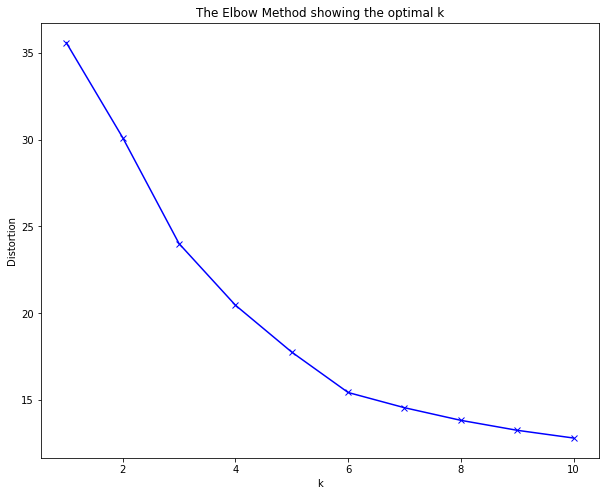

In [19]:
#2.2.1a - K-means model with k from 1 to 10
# k means determine k
distortions = []
K = range(1,11)

deg = df[['Spending Score (1-100)', 'Annual Income (k$)', 'Age']].iloc[: , :].values

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(deg)
    kmeanModel.fit(deg)
    distortions.append(sum(np.min(cdist(deg, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / deg.shape[0])

# Plot the elbow
plt.figure(figsize = (10, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

2.2.1.(b). From the above plot, we can see that 6 is the optimum number of clusters, as this is where the "elbow" of the curve appears.

In [20]:
#2.2.2.a - build a Gaussian mixture model
deg = pd.DataFrame(deg)
gmm_data = deg.values
gmm_model = mixture.GaussianMixture(n_components=6)
gmm_model.fit(gmm_data)
gmm_model

GaussianMixture(n_components=6)

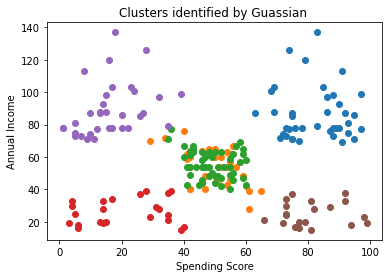

In [32]:
#2.2.2.b - scatter plot for the clusters of customers
cluster_labels = gmm_model.predict(gmm_data)
deg['cluster'] = cluster_labels

for k in range(0, gmm_model.n_components):
    data = deg[deg['cluster'] == k]
    plt.scatter(data[0], data[1])
plt.title("Clusters identified by Guassian ")
plt.ylabel("Annual Income")
plt.xlabel("Spending Score")
plt.show()

In [22]:
#2.2.3.a - build an agglomerative model
cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')
cluster.fit_predict(gmm_data)
cluster

AgglomerativeClustering(n_clusters=6)

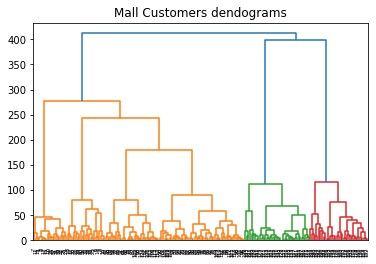

In [23]:
#plot a dendrogram
data_dendrogram = sch.dendrogram(sch.linkage(gmm_data, method="ward"))

plt.title("Mall Customers dendograms")
plt.show()

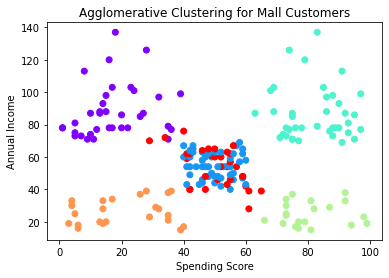

In [31]:
#2.2.3.b - plot a scatter plot with agglomerative clustering
plt.scatter(gmm_data[:,0], gmm_data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title("Agglomerative Clustering for Mall Customers")
plt.ylabel('Annual Income')
plt.xlabel('Spending Score')

plt.show()

In [25]:
#2.2.4.a - build a DBSCAN model
db_data = df.iloc[:,3:5].values
clustering = DBSCAN(eps=6, min_samples=3).fit(db_data)
set(clustering.labels_.astype('str'))

{'-1',
 '0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9'}

In [26]:
clustering

DBSCAN(eps=6, min_samples=3)

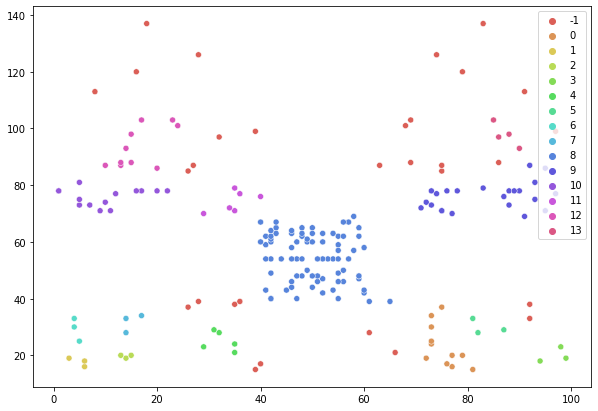

In [27]:
#2.2.4.b - scatter plot with DBSCAN
plt.figure(figsize=(10,7))
sns.scatterplot(db_data[:,1], db_data[:,0], hue=clustering.labels_, palette=sns.color_palette('hls', np.unique(clustering.labels_).shape[0]))
plt.show()

Result Analysis:
According to the gender distribution, the mall attracts 12% more females and females provide a higher spending score. Most of people who go to mall have a medium income from 60-80k. According to the clustering scatter plots, it is obvious that there are six customer segments, even though it is different from DBSCAN plot, but still shows similar result of customer segments.